
### Introduction
- Assume a neural network composed of three layers of neurons: input layer, hidden layer and output layer. We wish to train this network so when it is presented with a specific input it will have a certain output.
- For this experiment we are going to work with the [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist) and train our network to recognise handwritten 0-9 digits. Each image is an  matrix representing a digit.

<img src="nn.png" alt="neural-net" style="width: 400px;"/>

### The neural network

- **Network initialisation:**


1. Generate a set of weights between the input and the hidden layer. The input layer should have 784 neurons, one for each pixel of the image.

2. Generate a set of weights between the hidden and the output layer. The output layer should have 10 neurons, one for each digit.

3. Generate two sets of bias, one for the hidden layer and one for the output layer. Bias is set to 1 and it is an extra input to the neurons in order to avoid zero activation (all inputs equal to 0).   


- **Feedforward:**


1. Feed an image $\vec{x_k}$ to the network,
   

2. Compute the input to each of the neurons of the hidden layer, $act_{h_i} = \sum_{i=1}^{784}w_i x_i + bias$ and their outputs with the use of the [sigmoid function](http://mathworld.wolfram.com/SigmoidFunction.html),$out_{h_i} = \frac{1}{(1+e^{-act_i})}$.

3. Repeat for the output layer.

<img src="nn1.png" alt="neural-net" style="width: 400px;"/>


- **Error:**

1. Calculate the error in the output of the neural network. Given as input a zero image it is expected that the first neuron of the input layer to be fully active, i.e has an output of 1, while the rest neuron to have outputs of 0. Thus the target output would be $target = [1,0,0,\dots,0]^T$ and given that the output of the neural network is some $output$ the error is given by the formula $E = \sum_{i=1}^{n}\frac{1}{2}(target_i-output_i)^2$ where $n$ is the number of neurons in the output layer of the network. 

<img src="nn2.png" alt="neural-net" style="width: 400px;"/>


- **Backpropagation:**


1. Apply the delta rule between the output and the hidden layers. For the weight $w_{ij}$ we have $\frac{\vartheta E}{\vartheta w_{\textrm{ij}} }=\frac{\vartheta E}{\vartheta {\textrm{out}}_{o_i } }\;\frac{\vartheta {\textrm{out}}_{o_i } }{\vartheta {\textrm{act}}_{o_j } }\;\frac{\vartheta {\textrm{act}}_{o_j } }{\vartheta w_{\textrm{ij}} }\;=-\left({\textrm{target}}_i -{\textrm{output}}_i \right){\;\textrm{out}}_{o_i } \;\left(1-{\textrm{out}}_{o_i } \right)\;{\textrm{out}}_{h_j }$, where $\delta_{o_i } =\left({\textrm{target}}_i -{\textrm{output}}_i \right){\;\textrm{out}}_{o_i } \;\left(1-{\textrm{out}}_{o_i } \right)$.

2. Update the weights between the hidden and the output layers.  For the weight $w_{ij}$ we have ${\Delta w}_{\textrm{ij}} =-\eta \delta_{{\textrm{out}}_i } {\textrm{out}}_{h_j }$.

3. Repeat steps 1 and 2 between the hidden and the input layes and update the weights between them. Here for the weight $w_{ij}$ we have $\frac{\vartheta E}{\vartheta w_{\textrm{ij}} }=\frac{\vartheta E}{\vartheta {\textrm{out}}_{h_i } }\;\frac{\vartheta {\textrm{out}}_{h_i } }{\vartheta {\textrm{act}}_{h_j } }\;\frac{\vartheta {\textrm{act}}_{h_j } }{\vartheta w_{\textrm{ij}} }={\textrm{out}}_{h_i } \left(1-{\textrm{out}}_{o_i } \right)\left(w_{\textrm{ij}}^{\left(2\right)} \delta_{o_j }^{\left(2\right)} \right)$, where the terms $w_{\textrm{ij}}^{\left(2\right)} \delta_j^{\left(2\right)}$ are the weights and the delta function of the previous layer.

4. Update the weights between the hidden and the input layers. For the weight $w_{ij}$ we have ${\Delta w}_{\textrm{ij}} =-\eta \delta_{h_i } x_j$.

<img src="nn3.png" alt="neural-net" style="width: 400px;"/>

In [1]:
import numpy as np;
import numpy.matlib 
import math
import matplotlib.pyplot as plt
import csv

np.random.seed(0)

In [2]:
# Read the train set
x_train = np.loadtxt('train-images.idx3-ubyte.txt')
# Read the train labels
trainlabels = np.loadtxt('train-labels.idx1-ubyte.txt')
# Read the test set
x_test = np.loadtxt('t10k-images.idx3-ubyte.txt')
# Read the test labels
testlabels = np.loadtxt('t10k-labels.idx1-ubyte.txt')

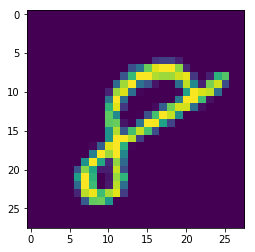

In [17]:
# Example of image, take the transpose to see it in the right orientation
example_image=np.reshape(x_train[:,-1],(28,28))
plt.imshow(example_image.T)
plt.show()

In [18]:
y_train=np.zeros((10,trainlabels.shape[0]))
y_test=np.zeros((10,testlabels.shape[0]))

for i in range(0,trainlabels.shape[0]):
    y_train[trainlabels[i].astype(int),i]=1
    
for i in range(0,testlabels.shape[0]):
    y_test[testlabels[i].astype(int),i]=1

In [19]:
y_train.shape

(10, 60000)

In [20]:
y_test.shape

(10, 10000)

In [21]:
[p, n] = x_train.shape
nlabels = 10

In [31]:
# n_epoch=45
n_epoch=6000
# n_batch=32
n_batch=100
n_input_layer=p #number of neurons on input layer
# n_hidden_layer=10 #number of neurons on a hidden layer
n_hidden_layer=16 #number of neurons on a hidden layer
n_output_layer=nlabels #number of neurons on output layer
eta=0.1

# Add another hidden layer
n_hidden_layer2 = 0 ##number of neurons of the hidden layer. 0 deletes this layer

In [32]:
# Initialize a simple network
#For W1 and W2, columns are the input and the rows are the output.
#W1: Number of columns (input) needs to be equal to the number of features 
#    of the  MNIST digits, thus p. Number of rows (output) should be equal 
#    to the number of neurons of the hidden layer thus n_hidden_layer.
#W2: Number of columns (input) needs to be equal to the number of neurons 
#    of the hidden layer. Number of rows (output) should be equal to the 
#    number of digits we wish to find (classification).

# create random matrix of weight (uniformally distrubuted)
W1=np.random.uniform(0,1,(n_hidden_layer,n_input_layer))
# normalise w1 (not really sure why but i can live with this)
W1=np.divide(W1,np.matlib.repmat(np.sum(W1,1)[:,None],1,n_input_layer))


# W1_5=np.random.uniform(0,1,(n_hidden_layer,n_hidden_layer))
# W1_5=np.divide(W1_5,np.matlib.repmat(np.sum(W1_5,1)[:,None],1,n_hidden_layer))


# W2=np.random.uniform(0,1,(n_output_layer,n_hidden_layer));
# W2=np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer));


W2=np.random.uniform(0,1,(n_output_layer,n_hidden_layer));
W2=np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer));


if n_hidden_layer2>0:
    
#     weights from ouput to second hidden layer
    W3=np.random.uniform(0,1,(n_output_layer,n_hidden_layer2));
    W3=np.divide(W3,np.matlib.repmat(np.sum(W3,1)[:,None],1,n_hidden_layer2));

#     weights from second hidden layer to first hidden layer
    W2=np.random.uniform(0,1,(n_hidden_layer2,n_hidden_layer));
    W2=np.divide(W2,np.matlib.repmat(np.sum(W2,1)[:,None],1,n_hidden_layer));



In [33]:
W2.shape,W1.shape

((10, 16), (16, 784))

In [34]:
# Initialize the biases

# set all biases to one
bias_W1=np.ones((n_hidden_layer,))
# bias_W1_5=np.ones((n_hidden_layer))
bias_W2=np.ones((n_output_layer,))

if n_hidden_layer2>0:
    
    bias_W3=np.ones((n_output_layer,))
    bias_W2=np.ones((n_hidden_layer2,))

# Keep track of the network inputs and average error per epoch
errors=np.zeros((n_epoch,));

In [35]:
# Train the network

# do this for every epoch
for epoch in range(0,n_epoch):

# for every batch
    for batch in range(0,n_batch):
        
        # Input (random element from the dataset)
        idx=np.random.randint(0,n); # get some index
        x=x_train[:,idx] #set x to a certain image (in vector form)
        
        # Neural activation: input layer -> hidden layer
        act1=np.dot(W1,x)+bias_W1 # calculate activations of next layer (just dot product of image and weights + bias)
        # Apply the sigmoid function
        out1=1/(1+np.exp(-act1)) #sigmoidal function from maths and stuff
    
#         # Neural activation: hidden later -> hidden layer
#         act1_5=np.dot(W1_5,out1)+bias_W1_5
#         out1_5=1/(1+np.exp(-act1_5))
    
#         # Neural activation: hidden layer -> output layer
#         act2=np.dot(W2,out1_5)+bias_W2 # then do the same thing for the next layer
#         # Apply the sigmoid function
#         out2=1/(1+np.exp(-act2))
        

        
#         # Form the desired output, the correct neuron should have 1 the rest 0
#         desired_output=y_train[:,idx] #get label

#         # Backpropagation: output layer -> hidden layer
#         out2delta=out2*(1-out2)*(out2-desired_output) 
#         W2=W2-eta*np.outer(out2delta,out1_5)
    
#         # Backpropagation: hidden layer -> hidden layer
#         out1_5delta=out1_5*(1-out1_5)*np.dot(W1_5.T,out2delta)
#         W1_5=W1_5-eta*np.outer(out1_5delta,out1) #outer(x,y) is xT * y
        
#         # Backpropagation: hidden layer -> input layer
#         out1delta=out1*(1-out1)*np.dot(W2.T,out2delta)
#         W1=W1-eta*np.outer(out1delta,x)
        
#         # Store the error per epoch
#         errors[i]=errors[i]+np.sum((out2-desired_output)*(out2-desired_output))/n_batch
        
#  

# Train the network
for epoch in range(0, n_epoch):
    for batch in range(0, n_batch):
        
        # Input (random element from the dataset)
        idx = np.random.randint(0,n)
        x = x_train[:,idx]
        
        # Neural activation: input layer -> hidden layer
        act1 = np.dot(W1,x) + bias_W1
        # Apply the sigmoid function
        out1 = 1 / (1 + np.exp(-act1))
        
        if n_hidden_layer2 > 0:
        
            # Neural activation: hidden layer -> hidden layer 2
            act2 = np.dot(W2, out1) + bias_W2
            # Apply the sigmoid function
            out2 = 1 / (1 + np.exp(-act2))
        
            # Neural activation: hidden layer 2 -> output layer
            act3=np.dot(W3, out2) + bias_W3
            # Apply the sigmoid function
            out3 = 1 / (1 + np.exp(-act3))
    
            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = y_train[:,idx]

            # Backpropagation: output layer -> hidden layer 2
            out3delta = out3 * (1 - out3) * (out3 - desired_output)
            W3 = W3 - eta * np.outer(out3delta, out2)
        
            # Backpropagation: hidden layer 2 -> hidden layer
            out2delta = out2 * (1 - out2) * np.dot(W3.T, out3delta)
            W2 = W2 - eta * np.outer(out2delta,out1)
            
            # Backpropagation: hidden layer -> input layer
            out1delta = out1 * (1 - out1) * np.dot(W2.T, out2delta)
            W1 = W1 - eta * np.outer(out1delta, x)
            
            # Store the error per epoch
            errors[epoch] = errors[epoch] + np.sum((out3 - desired_output) * (out3-desired_output)) / n_batch     
            
        else:
            
            # Neural activation: hidden layer -> output layer 
            act2 = np.dot(W2, out1) + bias_W2
            # Apply the sigmoid function
            out2 = 1 / (1 + np.exp(-act2))
        
            # Form the desired output, the correct neuron should have 1 the rest 0
            desired_output = y_train[:,idx]

            # Backpropagation: output layer -> hidden layer
            out2delta = out2 * (1 - out2) * (out2 - desired_output)
            W2 = W2 - eta * np.outer(out2delta, out1)
        
            # Backpropagation: hidden -> input layer
            out1delta = out1 * (1 - out1) * np.dot(W2.T,out2delta)
            W1 = W1 - eta * np.outer(out1delta,x)
                   
            # Store the error per epoch
            errors[epoch] = errors[epoch] + np.sum((out2 - desired_output)**2)      

        #errors[epoch] = errors[epoch] / n_batch 
    
    errors[epoch] = errors[epoch] / n_batch 

    if i % 100 == 0:
        print ('print epoch number{0}:'.format(i), errors[i])
        

In [36]:
errors

array([1.69787852, 0.9098563 , 0.90549731, ..., 0.08585392, 0.07398636,
       0.10197016])

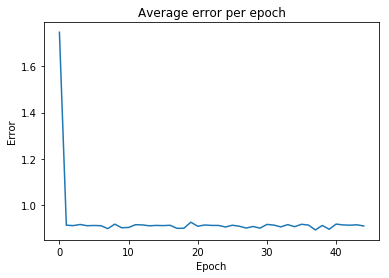

In [11]:
# Plot the performance
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Average error per epoch')
plt.show()

In [12]:
# TODO: use the test set to compute the network's accuracy

for j in range(0,n_batch):

    # Input (random element from the dataset)
    idx=np.random.randint(0,n2); # get some index
    x=x_test[:,idx] #set x to a certain image (in vector form)

    # Neural activation: input layer -> hidden layer
    act1=np.dot(W1,x)+bias_W1 # calculate activations of next layer (just dot product of image and weights + bias)
    # Apply the sigmoid function
    out1=1/(1+np.exp(-act1)) #sigmoidal function from maths and stuff

    # Neural activation: hidden later -> hidden layer
    act1_5=np.dot(W1_5,out1)+bias_W1_5
    out1_5=1/(1+np.exp(-act1_5))    
    
    # Neural activation: hidden layer -> output layer
    act2=np.dot(W2,out1_5)+bias_W2 # then do the same thing for the next layer
    # Apply the sigmoid function
    out2=1/(1+np.exp(-act2))
    
    # Form the desired output, the correct neuron should have 1 the rest 0
    desired_output=y_test[:,idx] #get label
    
# Store the error on the test set
errors=np.sum((out2-desired_output)*(out2-desired_output))/n_batch





In [13]:
errors

0.02806665369624495